In [1]:
using PyPlot

__Ejercicio 1:__ 

Se optó por implementar el método implícito de Euler haciendo uso del método de Newton.

In [2]:
#Definimos la función newton(f,df,x0), la cual tiene fomo argumentos la función f, su derivada (df) y la condición inicial (x0). El output de esta función es la raiz de f más cercana a x0.

function newton(f,df,x0)
    #Comenzamos tomando nuestra condición inicial
    x=x0;
    #Hacemos el for para aplicar el método de Newton 100 veces
    for i in 1:100
        x=x-f(x)/df(x)
    end
    #La función regresa el último valor de x obtenido
    return x
end;

In [3]:
#Definimos nuestro método implícito de Euler. Esta función tiene como argumentos la función f, su derivada respecto a x (dxf), la lista de t's (listt) y la condición inicial (x0).

function euler_imp(f,dxf,listt,x0)
    
#Definimos listx como un arreglo de zeros, con el mismo numero de entradas que listt
    listx=zeros(length(listt))

#Guardamos nuestra condición inicial en la primera entrada   
    listx[1]=x0

#Definimos h como la distancia entra las dos primeras entradas de listt.
    h=listt[2]-listt[1]
    
#El siguiente for es para ir guardando las sguientes entradas de listx
    for i in 1:length(listt)-1
        
#Definimos nuestra función g, dada por el método implícito, a la cual hay que encontrarle la raíz (que será nuestro x_{i+1})
    g(z)=z-f(z,listt[i+1])*h-listx[i]
        
#Derivamos respecto a z para definir la derivada de g
    dg(z)= 1-dxf(z,listt[i+1])*h  

#Aplicamos el método de Newton a g, tomando como condición inicial nuestra x_{i} y guardando el resultado (la raíz) como nuestro x_{i+1}.
    listx[i+1]=newton(g,dg,listx[i])    
        
    end
    
#La función regresa el arreglo de valores de x
    return listx
    
end;

__Ejercicio 2:__ 

In [4]:
#Definimos el método del punto medio. Las entradas son: f, la función; listt, la lista de t's; y x0, el valor inicial.

function punto_medio(f,listt,x0)
#Definimos h como la distancia entra las dos primeras entradas de listt.
    h=listt[2]-listt[1]
    
#Definimos listx como un arreglo de zeros, con el mismo numero de entradas que listt 
    listx=zeros(length(listt))
    
#Guardamos la condición inicial en la primera entrada de nuestra lista de x's
    listx[1]=x0
    
#El siguiente for es para aplicar la relación de recurrencia
    for i in 1:length(listt)-1
       listx[i+1]= listx[i]+h*f(listx[i]+(h/2)*f(listx[i],listt[i]),listt[i]+h/2)
    end 
    
#la función regresa la lista de x's
    return listx
    
end;

__Ejercicio 3:__

In [5]:
#Definimos la función que aplica el método de Runge-Kutta de orden 4. Las entradas son: f, la función; listt, la lista de t's; y x0, la condición inicial.

function runge_kutta_4(f,listt,x0)
    
#Definimos listx como un arreglo de zeros, con el mismo numero de entradas que listt 
    listx=zeros(length(listt))
    
#Guardamos la condición inicial en la primera entrada de nuestra lista de x's
    listx[1]=x0
    
#Definimos h como la distancia entra las dos primeras entradas de listt.
    h=listt[2]-listt[1]
    
#El siguiente for es para aplicar la relación de recurrencia
    for i in 1:length(listt)-1
        k1=f(listx[i],listt[i])
        k2=f(listx[i]+(h/2)*k1,listt[i]+h/2)
        k3=f(listx[i]+(h/2)*k2,listt[i]+h/2)
        k4=f(listx[i]+h*k3,listt[i+1])
        
#Vamos guardando nuestras x's en listx
        listx[i+1]=listx[i]+(h/6)*(k1+2*k2+2*k3+k4)
        
    end
      
#El método devuelve el arreglo de x's   
    return listx
    
end;

__Ejercicio 4:__

Queremos resolver $$\frac{dx}{dt}=-\alpha x,$$ con $\alpha= -2.5$ y $t\in(0,8)$.

In [6]:
#Definimos la función que representa la derivada
H(x,t)= -2.5x;
#También necesitamos su derivada respecto a x
dxH(x,t)=-2.5;

#### Método implícito

a)Para la condición inicial $x(0)=1.$

In [7]:
#Definimos los distintos arreglos de t's

#Para h=1
listt1=0:1:8
#Para h=0.5
listt2=0:0.5:8
#Para h=0.2
listt3=0:0.2:8
#Para h=0.01
listt4=0:0.01:8;

In [8]:
#Para h=1.0
solution_1_1=euler_imp(H,dxH,listt1,1.0);
#Para h=0.5
solution_1_2=euler_imp(H,dxH,listt2,1.0);
#Para h=0.2
solution_1_3=euler_imp(H,dxH,listt3,1.0);
#Para h=0.01
solution_1_4=euler_imp(H,dxH,listt4,1.0);

Con esta condición inicial, se obtiene que la solución exacta es:
$$x(t)=e^{-2.5 t}.$$ La cual usaremos para comparar la convergencia de las diferentes $h's$.

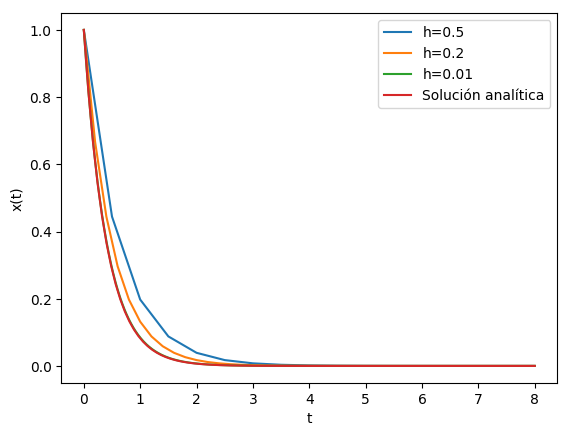

In [9]:
#Graficamos para distintas las distintas h's (a excepción de h=1)

plot(listt2,solution_1_2,label="h=0.5");
plot(listt3,solution_1_3,label="h=0.2");
plot(listt4,solution_1_4,label="h=0.01");


#Para graficar la solución analítica, dividimos el intervalo (0,8) en 100 puntos y aplicamos la solución (mostrada arriba). Usamos .^ para indicar que estamos operando sobre arreglos
plot(linspace(0,8,100),e.^(-2.5(linspace(0,8,100))),label="Solución analítica");

xlabel("t");
ylabel("x(t)");
legend();
show();


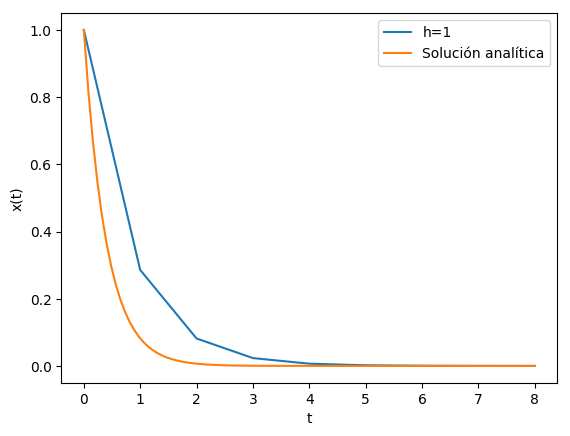

In [10]:
#Graficamos de forma independiente para h=1, pero llevando a cabo los mismos pasos.

plot(listt1,solution_1_1,label="h=1");
plot(linspace(0,8,100),e.^(-2.5(linspace(0,8,100))),label="Solución analítica");

xlabel("t");
ylabel("x(t)");
legend();
show();



b) Para la condición inicial $x(0)=2.$

In [11]:
#Usamos los mismos arreglos de t's

#Para h=1.0
solution_2_1=euler_imp(H,dxH,listt1,2.0);
#Para h=0.5
solution_2_2=euler_imp(H,dxH,listt2,2.0);
#Para h=0.2
solution_2_3=euler_imp(H,dxH,listt3,2.0);
#Para h=0.01
solution_2_4=euler_imp(H,dxH,listt4,2.0);

En este caso se obtiene que la solución analítica es :
$$x(t)=2 e^{-2.5 t}.$$ La cual usaremos para comparar la convergencia de las diferentes $h's$.

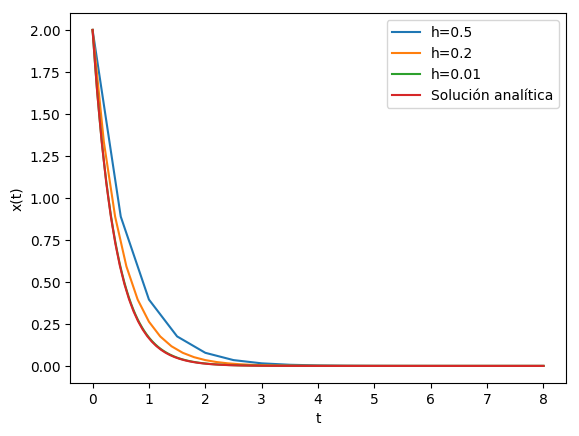

In [12]:
#Graficamos para distintas las distintas h's (a excepción de h=!º)

plot(listt2,solution_2_2,label="h=0.5");
plot(listt3,solution_2_3,label="h=0.2");
plot(listt4,solution_2_4,label="h=0.01");


#Para graficar la solución analítica, dividimos el intervalo (0,8) en 100 puntos y aplicamos la solución (mostrada arriba). Usamos .^ para indicar que estamos operando sobre arreglos
plot(linspace(0,8,100),2*e.^(-2.5(linspace(0,8,100))),label="Solución analítica");

xlabel("t");
ylabel("x(t)");
legend();
show();

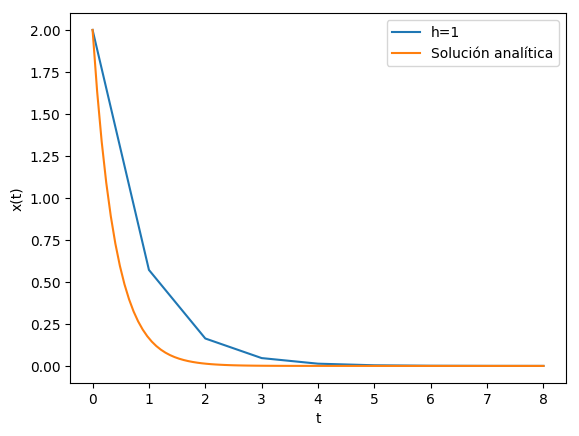

In [13]:
#Graficamos de forma independiente para h=1, pero llevando a cabo los mismos pasos.

plot(listt1,solution_2_1,label="h=1");
plot(linspace(0,8,100),2*e.^(-2.5(linspace(0,8,100))),label="Solución analítica");

xlabel("t");
ylabel("x(t)");
legend();
show();


#### Método explícito

Recordemos el método de Euler explícito.

In [14]:
#Creamos la función fuyos argumentos son la función f, la lista de t's listt y la condición inidical x0

function euler_exp(f,listt,x0)

#Definimos listx como un arreglo de zeros, con el mismo numero de entradas que listt 
    listx=zeros(length(listt))
    
#Guardamos la condición inicial en la primera entrada de nuestra lista de x's
    listx[1]=x0
    
#Definimos h como la distancia entra las dos primeras entradas de listt.
    h=listt[2]-listt[1]
    
#el siguiente for es para aplicar la relación de recurrencia
    for i in 1:length(listt)-1
        listx[i+1]=listx[i]+h*f(listx[i],listt[i])
    end
#la función regresa el arreglo de x's
    return listx
end;

a) Para la condición inicial $x(0)=1.$

In [15]:
#Usamos los mismos arreglos de t's

#Para h=1.0
e_solution_1_1=euler_exp(H,listt1,1.0);
#Para h=0.5
e_solution_1_2=euler_exp(H,listt2,1.0);
#Para h=0.2
e_solution_1_3=euler_exp(H,listt3,1.0);
#Para h=0.01
e_solution_1_4=euler_exp(H,listt4,1.0);

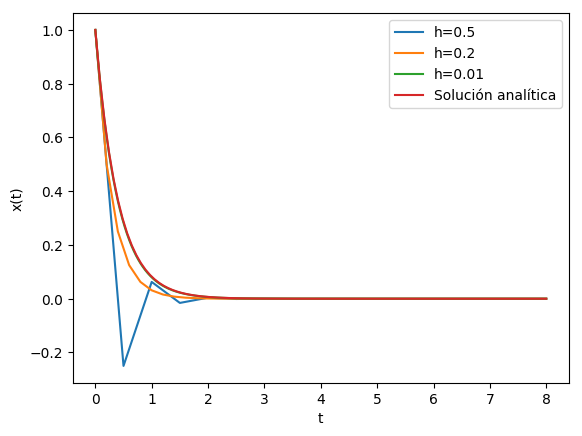

In [16]:
#Graficamos para distintas las distintas h's (a excepción de h=1)

plot(listt2,e_solution_1_2,label="h=0.5");
plot(listt3,e_solution_1_3,label="h=0.2");
plot(listt4,e_solution_1_4,label="h=0.01");


#Para graficar la solución analítica, dividimos el intervalo (0,8) en 100 puntos y aplicamos la solución (mostrada arriba). Usamos .^ para indicar que estamos operando sobre arreglos
plot(linspace(0,8,100),e.^(-2.5(linspace(0,8,100))),label="Solución analítica");

xlabel("t");
ylabel("x(t)");
legend();
show();

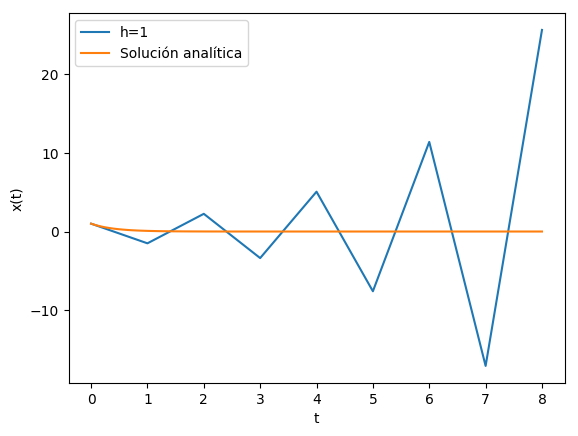

In [17]:
#Graficamos de forma independiente para h=1, pero llevando a cabo los mismos pasos.

plot(listt1,e_solution_1_1,label="h=1");
plot(linspace(0,8,100),e.^(-2.5(linspace(0,8,100))),label="Solución analítica");

xlabel("t");
ylabel("x(t)");
legend();
show();



b) Para la condición inicial $x(0)=2.$

In [18]:
#Usamos los mismos arreglos de t's

#Para h=1.0
e_solution_2_1=euler_exp(H,listt1,2.0);
#Para h=0.5
e_solution_2_2=euler_exp(H,listt2,2.0);
#Para h=0.2
e_solution_2_3=euler_exp(H,listt3,2.0);
#Para h=0.01
e_solution_2_4=euler_exp(H,listt4,2.0);

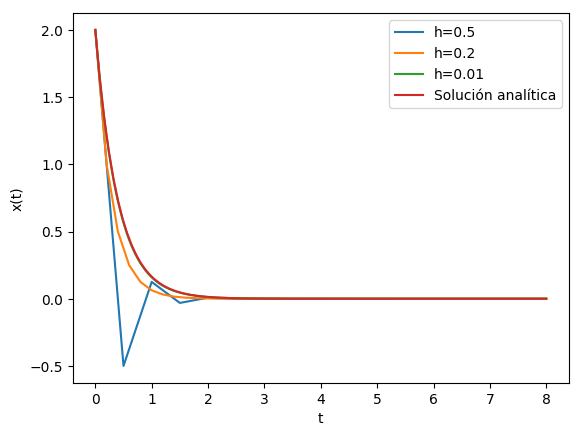

In [19]:
#Graficamos para distintas las distintas h's (a excepción de h=!º)

plot(listt2,e_solution_2_2,label="h=0.5");
plot(listt3,e_solution_2_3,label="h=0.2");
plot(listt4,e_solution_2_4,label="h=0.01");


#Para graficar la solución analítica, dividimos el intervalo (0,8) en 100 puntos y aplicamos la solución (mostrada arriba). Usamos .^ para indicar que estamos operando sobre arreglos
plot(linspace(0,8,100),2*e.^(-2.5(linspace(0,8,100))),label="Solución analítica");

xlabel("t");
ylabel("x(t)");
legend();
show();

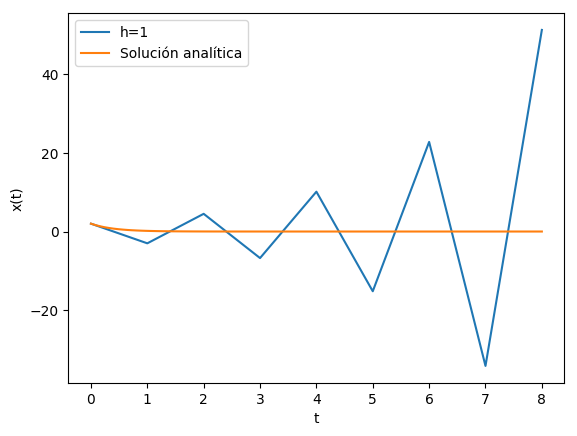

In [20]:
#Graficamos de forma independiente para h=1, pero llevando a cabo los mismos pasos.

plot(listt1,e_solution_2_1,label="h=1");
plot(linspace(0,8,100),2*e.^(-2.5(linspace(0,8,100))),label="Solución analítica");

xlabel("t");
ylabel("x(t)");
legend();
show();



De todos los resultados anteriores podemos hacer las siguientes observaciones, las cuales aplican para ambas condiciones iniciales:

- Para el caso de $h=1$, la gráfica dada por el método de Euler explicíto es muy distinta de la curva analítica, de hecho, podemos notar que oscila. Por otro lado, la curva dada por el método de Euler implícito comienza a "tomar" la forma exponencial desde $h=1$.

- Para $h=0.5$, la curva obtenida con el método explícito ya se acerca un poco más que en el caso de $h=1$, pero continua comportándose de forma extraña, ya que aún tiene algunos picos. Mientras que la correspondiete curva dada por el método implícito se acerca mucho más a la curva analítica.

- También se puede ver que el método de Euler explícito aproxima las curvas "por abajo", mientras que el método de Euler implícito lo hace "por arriba". Esto se puede ver claramente en el caso de $h=0.2$. En ambos métodos, las curvas dadas para esta $h$ se muestran bastante cerca de la curva teórica; la correspondiente al método implícito se encuentra por arriba, mientras que la correspondiente al método explícito se encuentra debajo. Otra diferencia cualitativa que muestran ambas curvas es que la primera se ve "más suave" que la segunda.

- Notamos que en ambos métodos la curva obtenida para $h=0.01$ se superpone (al menos en la escala mostrada) a la curva teórica.





__Ejercicio 5__: 

Queremos resolver la ecuación $$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$

Cuya solución analítica, sabemos que es $x(t)=4+8t-5t^2$, cuando $x(0)=4$.
Además escogemos $t\in(0,12)$

In [21]:
# Definimos la función que nos da la derivada
w(x,t)=(2x-18t)/(1+t);

In [22]:
#Definimos los arreglos de t's

#Para t=0.5
timelist1=0:0.5:12
#Para t=0.2
timelist2=0:0.2:12
#Para t=0.01
timelist3=0:0.01:12
#Para t=0.001
timelist4=0:0.001:12;

a) Punto medio

In [23]:
#Aplicamos nuestro método para diferentes h's (dadas por las listas de t's)

#h=0.5
pm_sol_1=punto_medio(w,timelist1,4.0);
#h=0.2
pm_sol_2=punto_medio(w,timelist2,4.0);
#h=0.01
pm_sol_3=punto_medio(w,timelist3,4.0);
#h=0.001
pm_sol_4=punto_medio(w,timelist4,4.0);

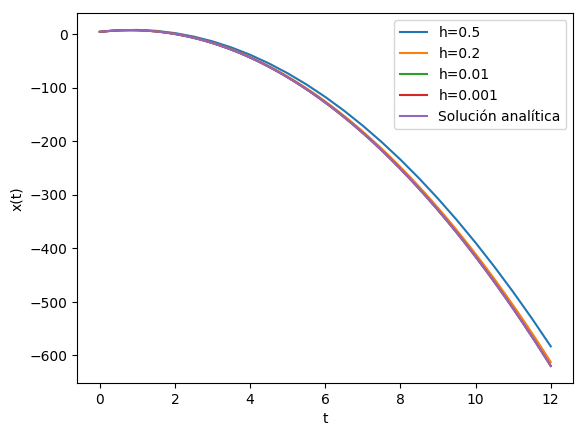

In [24]:
#Graficamos las soluciones para las distintas h's

plot(timelist1,pm_sol_1,label="h=0.5");
plot(timelist2,pm_sol_2,label="h=0.2");
plot(timelist3,pm_sol_3,label="h=0.01");
plot(timelist4,pm_sol_4,label="h=0.001");

#Para graficar la solución analítica, dividimos el intervalo (0,12) en 100 puntos y aplicamos la solución (mostrada arriba). Usamos .^ para indicar que estamos operando sobre arreglos
list=linspace(0,12,100)
plot(list,4+8*list-5*list.^(2),label="Solución analítica");
xlabel("t");
ylabel("x(t)");


legend();
show();


b) Runge-Kutta

In [25]:
#Aplicamos nuestro método para diferentes h's (dadas por las listas de t's)

#h=0.5
rku_sol_1=runge_kutta_4(w,timelist1,4.0);
#h=0.2
rku_sol_2=runge_kutta_4(w,timelist2,4.0);
#h=0.01
rku_sol_3=runge_kutta_4(w,timelist3,4.0);
#h=0.001
rku_sol_4=runge_kutta_4(w,timelist4,4.0);


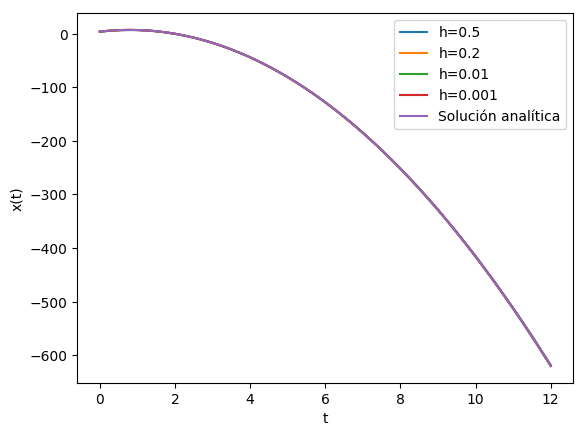

In [26]:
#Graficamos las soluciones para las distintas h's

plot(timelist1,rku_sol_1,label="h=0.5");
plot(timelist2,rku_sol_2,label="h=0.2");
plot(timelist3,rku_sol_3,label="h=0.01");
plot(timelist4,rku_sol_4,label="h=0.001");

#Para graficar la solución analítica, dividimos el intervalo (0,12) en 100 puntos y aplicamos la solución (mostrada arriba). Usamos .^ para indicar que estamos operando sobre arreglos
list=linspace(0,12,100)
plot(list,4+8*list-5*list.^(2),label="Solución analítica");
xlabel("t");
ylabel("x(t)");


legend();
show();


__Ejercicio 6__:

In [27]:
#Definimos el método de Euler para funciones de cualquier dimensión. Las entradas son: f, la función que nos da la derivada;listt,el arreglo de t's; y x0, el valor inicial.

function euler_method(f,listt,x0)
    
#Definimos h como la distancia entra las dos primeras entradas de listt.
    h=listt[2]-listt[1]
    
#Definimos x como nuestro valor inicial (arreglo de valores iniciales)
    x=x0
#Definimos listx como un objeto de tipo indefinido. Aquí es donde iremos guardando los puntos de la solución.
    listx=[]
    
#Guardamos nuestro valor inicial en listx
    push!(listx,x)

#el siguiente for es para aplicar la relación de recurrencia
    for i in 1:length(listt)-1
        
#Recordemos que el valor inicial de x es x0, por lo que el rango de i es correcto.
        x = x + f(x,listt[i])*h
        
#Cada que aplicamos la relación de recurrencia, vamos guardando el punto en listx.
        push!(listx,x) 
    end
#la función regresa el arreglo de x's
    return listx
end;

In [28]:
#Definimos el método de Runge-Kutta de orden 4 para funciones de cualquier dimensión. Las entradas son: f, la función que nos da la derivada;listt,el arreglo de t's; y x0, el valor inicial.
function r_k_4(f,listt,x0)
    
#Definimos h como la distancia entra las dos primeras entradas de listt.
    h=listt[2]-listt[1]
#Definimos x como nuestro valor inicial (arreglo de valores iniciales)    
    x=x0
    
#Definimos listx como un objeto de tipo indefinido. Aquí es donde iremos guardando los puntos de la solución.
    listx=[]
    
#Guardamos nuestro valor inicial en listx
    push!(listx,x)

#el siguiente for es para aplicar la relación de recurrencia
    for i in 1:length(listt)-1
        k1=f(x,listt[i])
        k2=f(x+(h/2)*k1,listt[i]+h/2)
        k3=f(x+(h/2)*k2,listt[i]+h/2)
        k4=f(x+h*k3,listt[i+1])
        
        x=x+(h/6)*(k1+2*k2+2*k3+k4)
        
 #Cada que aplicamos la relación de recurrencia, vamos guardando el punto en listx.       
        push!(listx,x)
    end
#la función regresa el arreglo de x's
    return listx
end;

Queremos resolver $\ddot{x}(t)=-kx(t).$ Como se vio en la tarea 11, esta ecuación es quivalente al sistema de ecuaciones acopladas:
$$\dot{x}=v$$
$$\dot{v}=-kx.$$

Usaremos el método de Euler en su forma vectorial, donde se tiene la expresión $$\frac{d\vec{x}}{dt}=\vec{F}(\vec{x},t).$$

En este caso $\vec{x}=(x,v)$ y $\vec{F}(\vec{x},t)=(v,-kx)$. 

Recordemos que $k$=$\frac{k'}{m}$, donde $k'$ es la constante del resorte y $m$ es la masa. En este caso, escojemos $k'=1$, $m=1$; de modo que $k=1$. Además, escogemos $\vec{x}(0)=(x(0),u(0))=(3,6)$ y $t \in (0,12).$

In [29]:
#Definimos la ecuación que nos da la derivada
F(x,t)=[x[2],-x[1]];

Por otra parte,  sabemos que la solución analítica es $$x(t)=3cos(t)+6sin(t).$$

Y la energía total debe ser 
$$E=T+U=\frac{1}{2}m\dot{x}^{2}+\frac{1}{2}k'x^{2}.$$

Sustituyendo la solución de $x$ y recordando que $k'=m=1$, tenemos que


$$E=\frac{1}{2}\left(-3sin(t)+6cos(t)\right)^{2}+\frac{1}{2}\left(3cos(t)+6sin(t)\right)^{2}$$
$$\implies E=\frac{1}{2} \left( 9sin^{2}(t)+36cos^{2}(t)-18sin(t)cos(t)+9cos^{2}(t)+36sin^{2}(t)+18sin(t)cos(t)\right)$$

$$\therefore \ E= 22.5$$

##### Comparación de métodos

In [30]:
#Definimos nuestro arreglo de t's, con h=0.1
timelist=0:0.1:12;

In [31]:
#Aplicamos el método de Euler
euler_sol=euler_method(F,timelist,[3,6]);

#Aplicamos el método de Runge-Kutta de orden 4
rk_sol=r_k_4(F,timelist,[3,6]);

In [32]:
#Tomando en cuenta que cada entrada de los arreglo de x's que regresan euler_method y r_k_4 está compuesto, en este caso, por un pareja (la posición y la velocidad), usamos map para "extraer" la entrada que necesitamos. Aquí se usa la ecuación de la energía dada arriba. Vamos guardadno las listas que nos dan la energía en cada punto

energy_euler= (1/2)*(map(x->x[1],euler_sol)).^2 +(1/2)*(map(x->x[2],euler_sol)).^2 ;
energy_rk= (1/2)*(map(x->x[1],rk_sol)).^2 +(1/2)*(map(x->x[2],rk_sol)).^2 ;

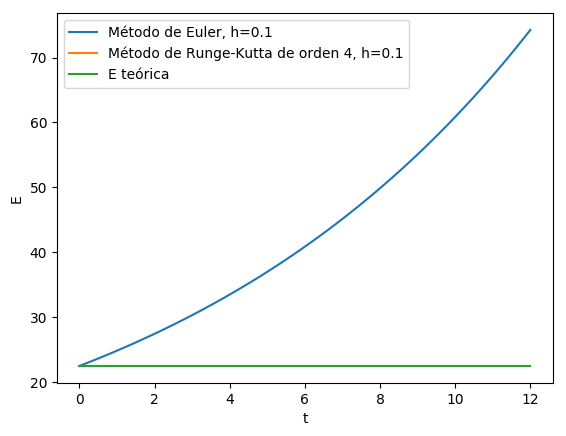

In [33]:
#Graficamos la energía obtenida con ambos métodos
plot(timelist,energy_euler,label=("Método de Euler, h=0.1"))
plot(timelist,energy_rk,label=("Método de Runge-Kutta de orden 4, h=0.1"))


#Graficamos la energía teórica
plot([0,12],[22.5,22.5],label=("E teórica"))

xlabel("t");
ylabel("E");
legend();
show();

- En primer lugar, sabemos que la curva teórica es una recta horizontal, ya que la energía total en un oscilador armónico es constante (por ser un sistema consevativo). 

- De la gráfica, podemos ver que para $h=0.1$, la curva obtenida para la energía con el método de Euler difiere enormemente de la recta esperada; de hecho, esta curva ni siquiera es una recta. Más aún, se trata de un curva creciente, al menos dentro del intervalo (0,12). Sin embargo, dicho intervalo no tiene nada de especial, por lo que, de extrapolar los resultados, se obtendría que $E\rightarrow\infty$ cuando $t\rightarrow\infty$, lo cual, sabemos, se trata de algo erróneo. Por tal motivo, se concluye que tomar $h=0.1$ en el método de Euler no es una buena aproximación.

- Finalmente, la curva obtenida por el método de Runge-Kutta de orden 4 se trata de una recta que parece coincidir de forma muy precisa con la recta horizontal esperada (de hecho, por la escala mostrada, pareciese que coinciden exactamente, pues solo es posible distinguir una de ellas). Sin embargo, no podemos asegurar que su pendiente sea exactamente 0. En este caso sí tendría sentido cuestionarnos acerca del intervalo utilizado. Dado un intervalo más grande, es posible que hubiésemos sido capaces de notar cierta pendiente, aunque fuese mínima. Aún así, comparado con el método de Euler, el método de Runge-Kutta nos regresa resultados mucho más exactos (dada la misma h). Por lo tanto, se corrobora que el error asociado al método de Runge-Kutta es mucho menor al error asociado al método de Euler.

__Ejercicio 7:__

In [34]:
#Definimos nuestro arreglo de t's con h=0.01
Time=0:0.01:50;

En este caso, nuevamente escogemos la condición inicial $\vec{x}(0)=(x(0),u(0))=(3,6)$

In [35]:
#Tomando en cuenta que cada entrada de los arreglo de x's que regresan euler_method y r_k_4 está compuesto, en este caso, por un pareja (la posición y la velocidad), usamos map para "extraer" la entrada que necesitamos.

#Creamos la lista de x's para el método de Runge-Kutta
rk_x_sol=map(x->x[1],r_k_4(F,Time,[3,6]));
#Creamos la lista de v's para el método de Runge-Kutta
rk_v_sol=map(x->x[2],r_k_4(F,Time,[3,6]));

#Creamos la lista de x's para el método de Euler
e_x_sol=map(x->x[1],euler_method(F,Time,[3,6]));
#Creamos la lista de v's para el método de Euler
e_v_sol=map(x->x[2],euler_method(F,Time,[3,6]));

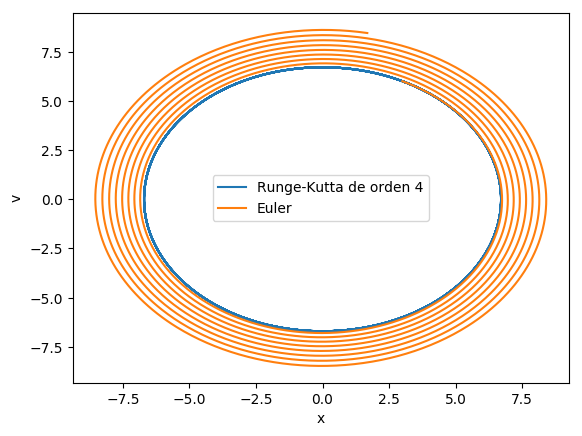

In [36]:
#Graficamos x vs v para ambos métodos
plot(rk_x_sol,rk_v_sol,label="Runge-Kutta de orden 4");
plot(e_x_sol,e_v_sol,label="Euler");
xlabel("x");
ylabel("v");
legend();
show();

__Ejercicio 8:__

En este caso, usaremos las misma lista de $t's$ que en el ejercicio anterior. Además usaremos la misma $F$ que ya se utlizó en ambos ejercicios anteriores, recordando que tomamos $k'=1$ y $m=1$, por lo que $k=1$. Dado que usamos $m$=1, también se obtiene que $p=v$, donde $p$ es el momento lineal.

Las condiciones iniciales que usaremos son:
1. $\vec{x}(0)=(x(0),v(0))=(5,0)$
- $\vec{x}(0)=(x(0),v(0))=(3,0)$
- $\vec{x}(0)=(x(0),v(0))=(4,3.5)$
- $\vec{x}(0)=(x(0),v(0))=(0,9)$
- $\vec{x}(0)=(x(0),v(0))=(0,15)$
- $\vec{x}(0)=(x(0),v(0))=(7,2)$
- $\vec{x}(0)=(x(0),v(0))=(0.5,8)$
- $\vec{x}(0)=(x(0),v(0))=(13,2)$
- $\vec{x}(0)=(x(0),v(0))=(17,3)$
- $\vec{x}(0)=(x(0),v(0))=(12,9)$

In [37]:
#Creamos las listas de x's y v's, para las distintas condiciones iniciales

#(5,0)
x_1=map(x->x[1],r_k_4(F,Time,[5,0]));
v_1=map(x->x[2],r_k_4(F,Time,[5,0]));

#(3,0)
x_2=map(x->x[1],r_k_4(F,Time,[3,0]));
v_2=map(x->x[2],r_k_4(F,Time,[3,0]));

#(4,3.5)
x_3=map(x->x[1],r_k_4(F,Time,[4,3.5]));
v_3=map(x->x[2],r_k_4(F,Time,[4,3.5]));

#(0,9)
x_4=map(x->x[1],r_k_4(F,Time,[0,9]));
v_4=map(x->x[2],r_k_4(F,Time,[0,9]));

#(0,15)
x_5=map(x->x[1],r_k_4(F,Time,[0,15]));
v_5=map(x->x[2],r_k_4(F,Time,[0,15]));

#(7,2)
x_6=map(x->x[1],r_k_4(F,Time,[7,2]));
v_6=map(x->x[2],r_k_4(F,Time,[7,2]));

#(0.5,8)
x_7=map(x->x[1],r_k_4(F,Time,[0.5,8]));
v_7=map(x->x[2],r_k_4(F,Time,[0.5,8]));

#(13,2)
x_8=map(x->x[1],r_k_4(F,Time,[13,2]));
v_8=map(x->x[2],r_k_4(F,Time,[13,2]));

#(17,3)
x_9=map(x->x[1],r_k_4(F,Time,[17,3]));
v_9=map(x->x[2],r_k_4(F,Time,[17,3]));

#(12,9)
x_10=map(x->x[1],r_k_4(F,Time,[12,9]));
v_10=map(x->x[2],r_k_4(F,Time,[12,9]));

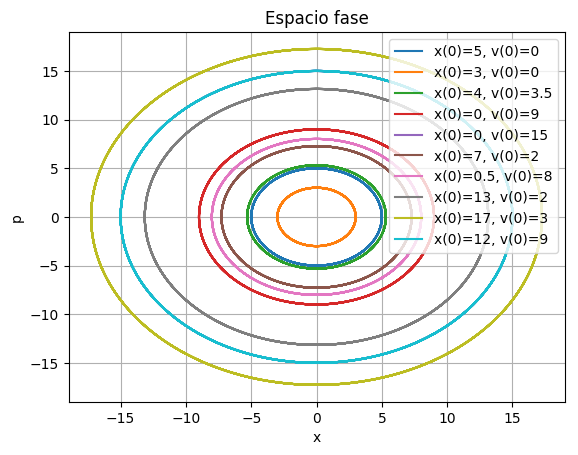

In [38]:
#Graficamos v vs x para cada condición inicial. En este caso v=p, por lo que en realidad estamos graficando el espacio fase.

plot(x_1,v_1,label="x(0)=5, v(0)=0");
plot(x_2,v_2,label="x(0)=3, v(0)=0");
plot(x_3,v_3,label="x(0)=4, v(0)=3.5");
plot(x_4,v_4,label="x(0)=0, v(0)=9");
plot(x_5,v_5,label="x(0)=0, v(0)=15");
plot(x_6,v_6,label="x(0)=7, v(0)=2");
plot(x_7,v_7,label="x(0)=0.5, v(0)=8");
plot(x_8,v_8,label="x(0)=13, v(0)=2");
plot(x_9,v_9,label="x(0)=17, v(0)=3");
plot(x_10,v_10,label="x(0)=12, v(0)=9")

title("Espacio fase")
xlabel("x");
#como m=1, p=v, entonces nombramos el eje de las ordenadas como p (pues queremos el espacio fase)
ylabel("p");
grid("on");
legend();
show();

En la gráfica se puede apreciar que, tal como se esperaba, las curvas obtenidas son elipses con centro en (0,0).

Por otro lado, recordemos que, en la tarea 11 se obtuvo que la solución al oscilador armónico es:

 $$x(t)=x(0)cos(\sqrt{k}t) + \frac{\dot{x}(0)}{\sqrt{k}}sin(\sqrt{k}t),$$
 
 donde $k=k'/m$. En este caso, $k=1$, por lo que
 
 $$x(t)=x(0)cos(t) +\dot{x}(0)sin(t).$$
 
 De lo anterior, se puede mostrar que la amplitud de oscilación será $A=\sqrt{x^{2}(0)+\dot{x}^{2}(0)}.$ Dicha amplitud también será igual al semieje mayor de nuestra correspondiente elipse.
 
 De este modo, podemos ver los correspondientes semiejes mayores para las distintas condiciones iniciales:
 
1. $(x(0),v(0))=(5,0)\rightarrow A=5$
- $(x(0),v(0))=(3,0) \rightarrow A=3$
- $(x(0),v(0))=(4,3.5)\rightarrow A=5.32$
- $(x(0),v(0))=(0,9)\rightarrow A=9$
- $(x(0),v(0))=(0,15)\rightarrow A=15$
- $(x(0),v(0))=(7,2)\rightarrow A=7.28$
- $(x(0),v(0))=(0.5,8)\rightarrow A=8.02$
- $(x(0),v(0))=(13,2)\rightarrow A=13.15$
- $(x(0),v(0))=(17,3)\rightarrow A=17.26$
- $(x(0),v(0))=(12,9)\rightarrow A=15$

De la gráfica del espacio fase, observando la coordenada $x$ cuando $p=0$ para cada elipse, se puede verificar que los semiejes mayores corresponden a los valores esperados. Por lo tanto, los resultados obtenidos son correctos.